In [338]:
import pandas as pd
import yfinance as yf 
import datetime 
from dateutil import parser
import plotly.graph_objects as go 
dff = pd.read_excel('fake_trades.xlsx')


def pnl_over_months(df: pd.DataFrame) -> go.Figure:
    df = df[df['Status'] != "Open"]
    df['Return $'] = df['Shares'] *(df['Exit Price'] - df['Entry Price'])
    df['Exit Date'] = df['Exit Date'].apply(lambda x: x.replace(day = 1))

    wins = df[df['Return $'] >= 0 ].copy()
    losses = df[df['Return $'] <0].copy()
    wins = wins.groupby(by = "Exit Date").sum()
    losses = losses.groupby(by = "Exit Date").sum()
    fig = go.Figure(data=[
    go.Bar(name='Wins',
        x=wins.index.tolist(),
        y=wins['Return $'].tolist(),
        marker_color = "#4CBB17"),
    go.Bar(name='Losses', 
        x=losses.index.tolist(), 
        y=losses['Return $'].tolist(),
        marker_color = "#FF5733 "),
])

    # Change the bar mode
    fig.update_layout(
        title = {
            "text": "Wins vs Losses Over Time",
            "x": .5,
            "y": .9,
            "xanchor" : "center",
            "yanchor": "top"
        },
        xaxis_title = "Date",
        yaxis_title = "PnL",
        barmode = "relative",
        )
    return fig
dff

,Status,Entry Date,Symbol,Shares,Entry Price,Exit Date,Exit Price,Return $,Return %,Strategy
0,Open,2022-06-24,SPY,10.0,315,NaT,NaN,NaN,NaN,NaN
1,Open,2022-05-24,HDSN,200.0,7,NaT,NaN,NaN,NaN,NaN
2,Open,2022-06-20,IPI,200.0,54,NaT,NaN,NaN,NaN,NaN
3,Loss,2022-05-20,CPT,300.0,175,2022-06-16,150.0,NaN,NaN,NaN
4,Loss,2022-05-20,WSC,1000.0,41,2022-06-17,38.0,NaN,NaN,NaN
5,Win,2022-06-02,HCAT,-90.0,20,2022-06-15,12.0,NaN,NaN,NaN
6,Win,2022-06-10,Zyme,-10.0,9,2022-06-20,5.0,NaN,NaN,NaN
7,Win,2022-04-08,ABC,100.0,9,2022-04-23,10.0,NaN,NaN,NaN
8,win,2022-03-08,AAPL,10.0,100,2022-03-20,101.0,NaN,NaN,NaN
9,Loss,2022-03-09,GOOGL,100.0,2000,2022-03-29,1900.0,NaN,NaN,NaN


In [339]:
df = dff.copy()



In [416]:
df = df.sort_values(by = ['Exit Date'])

In [419]:
df['Return $'].cumsum().tolist()

[-3781.0, 16219.0, 16229.0, 6229.0, 6329.0, 7049.0, -451.0, -3451.0, -3411.0]

In [423]:
df['pnl'] = df['Return $'].cumsum().tolist()

In [429]:
df.reset_index(drop = True,inplace = True)

<AxesSubplot:>

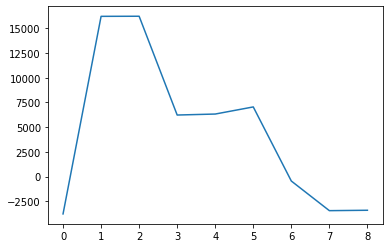

In [430]:
df['pnl'].plot()

In [332]:

def pnl_over_time_chart(df):
    df = df[df['Status'] != "Open"]
    df['Return $'] = df['Shares'] *(df['Exit Price'] - df['Entry Price'])
    df['Exit Date'] = df['Exit Date'].apply(lambda x: x.replace(day = 1))
    df = df.groupby(by = 'Exit Date').sum()
    wins = df[df['Return $'] >= 0 ].copy()
    losses = df[df['Return $'] <0].copy()
    wins = wins.groupby(by = "Exit Date").sum()
    losses = losses.groupby(by = "Exit Date").sum()
                
    fig = go.Figure()
    fig.add_trace(go.Bar(x=losses.index.tolist(), y=losses['Return $'].tolist(),
                    base=0,
                    marker_color='crimson',
                    name='Losses'))
    fig.add_trace(go.Bar(x=wins.index.tolist(), y=wins['Return $'].tolist(),
                    base=0,
                    marker_color='chartreuse',
                    name='Profits'
                    ))
    return fig 
    